# Rayos X

## Proyecciones

#### Pregunta 1

Un cuadrado de 5x5 casilleros se rellena con números del 1 al 25, comenzando arriba a la izquierda y terminando abajo a la derecha. Encuentre la proyección para θ=45°. Asuma que la línea de proyección central cruza por el píxel central del cuadrado.

### Pregunta 2

Considere el circulo unitario dado por

$$f(x, y)=\left\{\begin{array}{ll}1 & x^{2}+y^{2} \leq 1 \\ 0 & x^{2}+y^{2}>1\end{array}\right\}$$

¿Cuál es su proyección para $\theta=0$?

### Pregunta 3

Considere el objeto de la siguiente figura, el
cual corresponde a un triangulo equilátero centrado en el origen, de lado a y tiene un lado paralelo al eje x. Considere que el objeto tiene un coeficiente lineal de atenuación u = 1, y a =6.

![download (1).png](<attachment:download (1).png>)
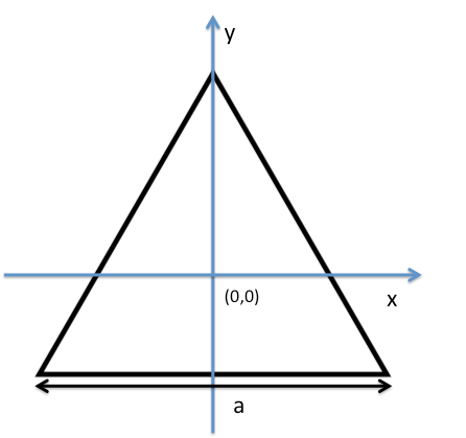

### Pregunta 4

Calcule matemáticamente la transformada de radón del objeto mostrado en la siguiente figura:

![Screenshot 2023-09-15 at 09.21.09.png](<attachment:Screenshot 2023-09-15 at 09.21.09.png>)
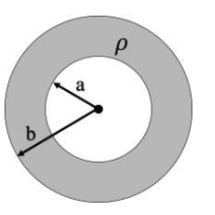

## Simulación rayos X

Simule atenuación de rayos X con una fuente puntual en infinito 


In [36]:
# imports
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
# for numerical integration
import scipy.integrate as scint

### Dominio

In [49]:
num_x = 128
px = np.linspace(-1, 0, num_x)
py = np.linspace(-1/2, +1/2, num_x)
[ mx, my ] = np.meshgrid(px, py)

### Objetos

In [50]:
circulo = lambda x, y : np.where( np.abs(x + 0.5) ** 2 + np.abs(y) ** 2 <= 0.1 ** 2, 1.0, 0.0)
cuadrado = lambda x, y : np.where( np.maximum(np.abs(x + 0.5), np.abs(y)) <= 0.1, 1.0, 0.0)

### Integral de línea

In [51]:
# this integrates along segments
def integrate_segment_2d(f, xs, xe):
    if isinstance(xs, list):
        xs = np.array(xs)
    if isinstance(xe, list):
        xe = np.array(xe)
    return np.linalg.norm(xs - xe) * scint.quad(lambda s : f(xs[0] + s * (xe[0] - xs[0]), xs[1] + s * (xe[1] - xs[1])), 0.0, 1.0, complex_func=False)[0]

### Transformación coordenadas a índices

In [52]:
def x_coord_to_index(x):
    if isinstance(x, list):
        x = np.array(x)
    return (num_x - 1) * (x - px.min()) / (px.max() - px.min())
    
def y_coord_to_index(y):
    if isinstance(y, list):
        y = np.array(y)
    return (num_x - 1) * (y - py.min()) / (py.max() - py.min())

def coord_to_index(x):
    return np.array([ x_coord_to_index(x[0]), y_coord_to_index(x[1]) ], dtype=float)

### Gráficos

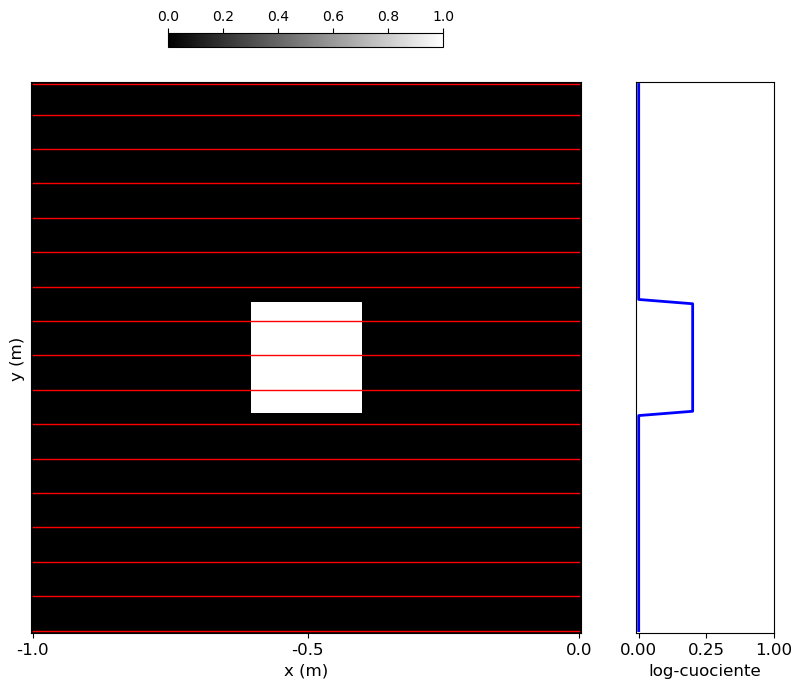

In [53]:
%timeit
f = cuadrado

xs,xe = ( np.array([ [-1.0, _y] for _y in py]), np.array([ [0.0, _y] for _y in py]))
#xs,xe = ( np.array([ [-1.0, -0.4] for _y in py]), np.array([ [0.0, _y] for _y in py]))

Rf = np.array([ integrate_segment_2d(f, xs[i], xe[i]) for i in range(xs.shape[0])])

# indices for plotting ticks
pidx = [ I * num_x // 2 for I in range(2) ] + [ num_x - 1 ]
# indices for plotting paths
N_rays = 16 # número de rayos a visualizar
ridx = [ I * num_x // N_rays for I in range(N_rays) ] + [ num_x - 1 ]

# DENSITY AND XRAY
#   Taken from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
fig = plt.figure(figsize=(8, 8), layout='constrained')
ax = fig.add_gridspec(top=1.00, right=0.75).subplots()
ax.set(aspect=1)
ax_side = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax_im = ax.imshow(f(mx, my), origin='lower', vmin=0.0, cmap='gray')
for I in ridx:
    ax.plot((x_coord_to_index(xs[I][0]),x_coord_to_index(xe[I][0])), (y_coord_to_index(xs[I][1]),y_coord_to_index(xe[I][1])), color='r', linewidth=1, zorder=+5)
ax.set_xticks(pidx, labels=[ '{:.1f}'.format(_x) for _x in px[pidx] ], fontsize=12)
ax.set_yticks(pidx, labels=[ '{:.1f}'.format(_y) for _y in py[pidx] ], fontsize=12)
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
plt.colorbar(ax_im, shrink=0.5, orientation='horizontal', ticklocation='top', location='top')

ax_side.plot(Rf, range(num_x), color='b', linewidth=2)
ax_side.set_yticks([])
ax_side.set_xticks(ticks=[0.00, 0.25, 0.50], labels=[ '0.00', '0.25', '1.00' ], fontsize=12)
ax_side.set_xlabel('log-cuociente', fontsize=12)

plt.show()

# Transformada de radón

In [85]:
# number of nodes
num_x = 128
num_p = num_x
num_t = num_x

# spatial coordinates
px = None
py = None
[ mx, my ] = None

# radon coordinates
pp = None
pt = None
ct = 180 / np.pi

[ mp, mtheta ] = np.meshgrid(pp, pt)

In [87]:
def circle(x, y):
    return None

def square(x,y):
    return None


In [ ]:
f = square

xs,xe = None

Rf = np.array([ integrate_segment_2d(f, xs[i], xe[i]) for i in range(xs.shape[0])])

# indices for plotting ticks
pidx = [ I * num_x // 2 for I in range(2) ] + [ num_x - 1 ]
# indices for plotting paths
N_rays = 8 # número de rayos a visualizar
ridx = [ I * num_x // N_rays for I in range(N_rays) ] + [ num_x - 1 ]

# DENSITY AND XRAY
#   Taken from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
fig = plt.figure(figsize=(8, 8), layout='constrained')
ax = fig.add_gridspec(top=1.00, right=0.75).subplots()
ax.set(aspect=1)
ax_side = ax.inset_axes([1.1, 0, 0.25, 1], sharey=ax)

ax_im = ax.imshow(f(mx, my), origin='lower', vmin=0.0, cmap='gray')
for I in ridx:
    ax.plot((x_coord_to_index(xs[I][0]),x_coord_to_index(xe[I][0])), (y_coord_to_index(xs[I][1]),y_coord_to_index(xe[I][1])), color='r', linewidth=1, zorder=+5)
ax.set_xticks(pidx, labels=[ '{:.1f}'.format(_x) for _x in px[pidx] ], fontsize=12)
ax.set_yticks(pidx, labels=[ '{:.1f}'.format(_y) for _y in py[pidx] ], fontsize=12)
ax.set_xlabel('x (m)', fontsize=12)
ax.set_ylabel('y (m)', fontsize=12)
plt.colorbar(ax_im, shrink=0.5, orientation='horizontal', ticklocation='top', location='top')

ax_side.plot(Rf, range(num_x), color='b', linewidth=2)
ax_side.set_yticks([])
ax_side.set_xticks(ticks=[0.00, 0.25, 0.50], labels=[ '0.00', '0.25', '1.00' ], fontsize=12)
ax_side.set_xlabel('log-cuociente', fontsize=12)

plt.show()

In [121]:
Rot = None

def radon_transform(f,px,py,pp,pt):
    
    #xs,xe = None # point source in infinity
    xs,xe = None # point source
    return None



In [122]:
Radon_circle = radon_transform(circle,px,py,pp,pt)
Radon_square = radon_transform(square,px,py,pp,pt)


/var/folders/jm/qkslqjg102d5tzd_s4qjyg040000gn/T/ipykernel_13169/3755587305.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.linalg.norm(xs - xe) * scint.quad(lambda s : f(xs[0] + s * (xe[0] - xs[0]), xs[1] + s * (xe[1] - xs[1])), 0.0, 1.0, complex_func=False)[0]
/var/folders/jm/qkslqjg102d5tzd_s4qjyg040000gn/T/ipykernel_13169/3755587305.py:7: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) i

In [123]:
# number of photons
Nph = 1000
# noisy image
Radon_circle_noisy = -np.log(np.random.binomial(Nph, np.exp(-Radon_circle)) / Nph)
Radon_square_noisy = -np.log(np.random.binomial(Nph, np.exp(-Radon_square)) / Nph)

In [ ]:
plt.subplot(2,2,1)
plt.imshow(Radon_circle.T,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(Radon_square.T,cmap='gray')
plt.axis('off')


plt.subplot(2,2,3)
plt.imshow(Radon_circle_noisy.T,cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(Radon_square_noisy.T,cmap='gray')
plt.axis('off')
plt.gcf().set_dpi(150)

# Retroproyección

In [125]:
def filter_radon_slice(p, f, eps=1E-4):
    '''
    Completar
    '''
    return None

In [126]:

Radons = [Radon_square,Radon_circle,Radon_square_noisy,Radon_circle_noisy]

BPS = []
for Radon in Radons:
    # step
    dpt = None
    # filtered backprojection
    BP = None
    fbidx = np.where(pt <= np.pi)[0] # Considerar proyecciones solo hasta 180 grados
    for _t, _f, in zip(pt[fbidx], Radon[fbidx]):
        # points in p where to evaluate the slice
        _p = None
        # evaluate using interpolation
        BP = None
    BPS.append(BP)

In [ ]:
for i in range(len(BPS)):
    plt.subplot(2,2,i+1)
    plt.imshow(BPS[i],cmap='gray')
    plt.axis('off')

plt.gcf().set_dpi(150)